In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

# Activation Functions

A small notebook that documents different popular activation functions used in neural networks, their behavior, pros/cons and use cases.

In [2]:
# Here are some helper functions that are used throughout the notebook

def derivative(function, x):
    x = torch.tensor(x, requires_grad=True)
    y = function(x)
    y.backward()
    return x.grad.item()

def plot(activation, name, formula):   
    x_values = torch.linspace(-3, 3, 100)
    y_values = [activation(x).item() for x in x_values]
    dy_values = [derivative(activation, x) for x in x_values]

    # Plotting
    plt.figure(figsize=(8, 4))
    plt.plot(x_values, y_values, label="f(x) = " + formula)
    plt.plot(x_values, dy_values, label="f'(x)", linestyle='--')
    plt.title(name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Linear Activation

### Formula
$f(x) = x$

### Behavior
A straight line that passes through origin with slope of 1, and its derivative is a constant value of 1.

### Cons
Pretty useless since it does not do anything to our data. When designing ANNs, we would like nonlinearity between each layer of the network so we can approximate more complex functions. If we had a multi-layer neural network with a linear activation function, we are just doing a linear combination, which means you might as well have a single-layer neural network with the same number of weights. The model is no more expressive that standard logistic regression.

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_49415/821072442.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


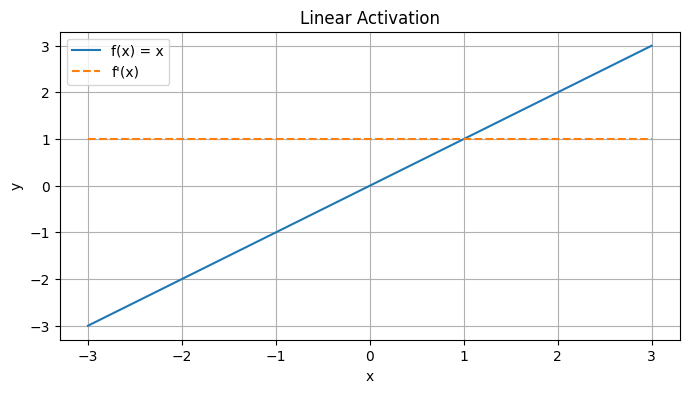

In [3]:
def linear(x):
    return x

plot(linear, 'Linear Activation', 'x')

# ReLU

### Formula
$
f(x) = \text{max}(0,x) = 
\begin{cases} 
x & \text{if } x > 0 \\
0 & \text{if otherwise} 
\end{cases}
$

### Behavior
Outputs zero when the input is negative, and x when x is positive. Its derivative is 1 when x is positive and 0 when x is negative. It is not differentiable at $x = 0$.

### Pros
Very popular choice to build ANNs, mainly because it creates sparse models, since neurons with negative pre-activation values get zeroed out. Sparse models are generally very computationally and memory efficient, and have improved generalization capabilities. There is also a reduced likelihood of vanishing gradient problem if the pre-activation value is 1 since the gradient is a constant, rather than a potentially incredibly small float, which occurs with tanh and sigmoid activation values. Also the gradient is either 0 or 1, which makes backpropagation simple.

### Cons
Once a neuron activation becomes 0, the particular neuron can no longer affect the parameters of the network during backprop, since its value and gradient becomes 0. This is called the Dying ReLU problem. Also there is a positive bias shift in the network since the mean activation is larger than 0, which can slow down learning. 

/var/folders/5t/1wwb4x_d4hd53smqcd96d_500000gn/T/ipykernel_49415/821072442.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x, requires_grad=True)


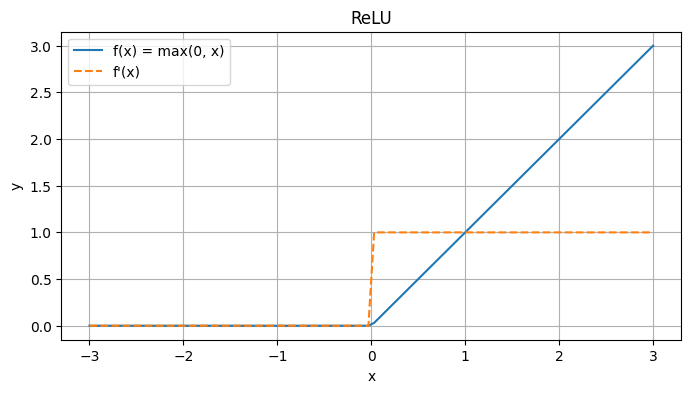

In [4]:
def ReLU(x):
    return torch.max(torch.tensor(0), x)

plot(ReLU, 'ReLU', 'max(0, x)')